In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from tqdm import tqdm

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/0_1.jpg'

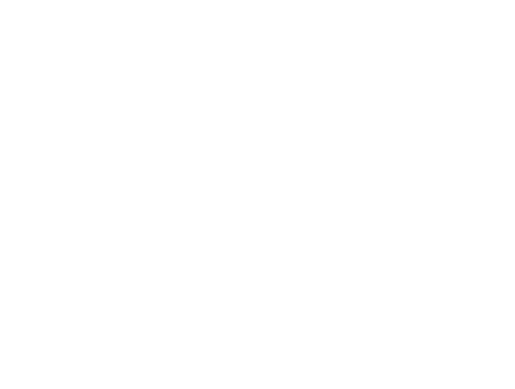

In [6]:
src_x_train = []
y_train = []
src_x_test = []
y_test = []

plt.axis('off')

for i in range(0, 4):
  for j in range(0, 4):
    src_x_train.append(cv2.cvtColor(mpimg.imread('dataset/{}_{}.jpg'.format(i, j + 1)), cv2.COLOR_BGR2GRAY))
    y_train.append([1 if k == i else 0 for k in range(4)])

for i in range(0, 4):
  src_x_test.append(cv2.cvtColor(mpimg.imread('dataset/{}_test.jpg'.format(i)), cv2.COLOR_BGR2GRAY))
  y_test.append([1 if k == i else 0 for k in range(4)])

plt.imshow(src_x_train[8], cmap='binary')
print(y_train[8])


In [6]:
x_train = np.divide(np.array(src_x_train), 255)
x_test = np.divide(np.array(src_x_test), 255)

In [204]:
from numpy.ma.core import argmax

class Model():
    def __init__(self, in_features: int, out_features: int):
        self.in_features = in_features
        self.out_features = out_features
        self.weights = np.random.rand(in_features, out_features)

    def sigmoid(self, x):
      return 1 / (1 + np.exp(-x))

    def forward(self, x):
        x = np.dot(x, self.weights)
        return self.sigmoid(x)
    
    def correct_weights(self, x, delta, outputs, train_speed_factor):
      self.weights = self.weights + np.array([i * delta for i in x]) * train_speed_factor

    def train(self, x_train, y_train, epoh, train_speed_factor):
        for i in range(epoh):
            corrected = 0
            all = 0

            for (x, y) in zip(x_train, y_train):
                x = np.squeeze(np.asarray(x).reshape(-1))
                outp = self.forward(x)
                delta = y - outp
                self.correct_weights(x, delta, train_speed_factor)

                corrected += argmax(outp) == argmax(y)
                all += 1

    def train_until_success(self, x_train, y_train, train_speed_factor):
        epoches = 0
        success = 0

        while (True):
          epoches += 1
          corrected = 0
          all = 0

          for (x, y) in zip(x_train, y_train):
              x = np.squeeze(np.asarray(x).reshape(-1))
              outp = self.forward(x)
              delta = y - outp
              self.correct_weights(x, delta, train_speed_factor)

              corrected += argmax(outp) == argmax(y)
              all += 1

          if (corrected == all):
            success += 1
          else:
            success = 0

          if (success == 4):
            print(epoches)
            break

    def train_until_weights_same(self, x_train, y_train, train_speed_factor):
        epoches = 0
        prev_results = []

        for (x, y) in zip(x_train, y_train):
          x = np.squeeze(np.asarray(x).reshape(-1))
          outp = self.forward(x)
          prev_results.append(outp)

        self.weights = np.random.rand(self.in_features, self.out_features)  

        while (True):
          epoches += 1
          all = 0
          corrected = 0

          for (x, y) in zip(x_train, y_train):
              x = np.squeeze(np.asarray(x).reshape(-1))
              outp = self.forward(x)
              delta = y - outp
              self.correct_weights(x, delta, outp, train_speed_factor)

              if (np.array_equal(np.around(outp, decimals=6), np.around(prev_results[all], decimals=6))):
                corrected += 1

              prev_results[all] = outp
              all += 1

          if (corrected > 15):
            print(epoches)
            return

In [207]:
model = Model(28*28, 4)
#model.train(x_train, y_train, 1000, 0.1)
#model.train_until_success(x_train, y_train, 0.0001)
model.train_until_weights_same(x_train, y_train, 0.1)

757


In [33]:
def test_model(model, X_test, y_test):
  corrected = 0
  all = 0
  for (x, y) in tqdm(zip(X_test, y_test)):
    x = np.squeeze(np.asarray(x).reshape(-1))
    outp = model.forward(x)
    corrected += argmax(outp) == argmax(y)
    all += 1
  print("acc == ", corrected / all)


In [208]:
test_model(model, x_test, y_test)

4it [00:00, 2740.93it/s]

acc ==  0.75


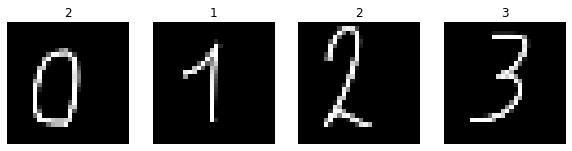

In [209]:
fig = plt.figure(figsize=(10, 7))
for i in range(0, 4):
    fig.add_subplot(1, 4, i + 1)   
    x = x_test[i]
    x = np.squeeze(np.asarray(x).reshape(-1))
    plt.imshow(x_test[i], cmap='binary')
    plt.axis('off')
    plt.title(argmax(model.forward(x)))